## This notebook for solve task about decrease dimensional

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.decomposition import PCA

with open('eigen.pkl', 'br') as file:
    X = pickle.load(file)

<function matplotlib.pyplot.show(close=None, block=None)>

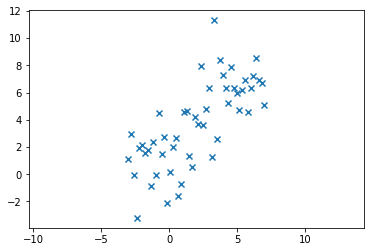

In [17]:
plt.scatter(X[:,0], X[:,1], marker='x')
plt.axis('equal')
plt.show

In [25]:
pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

In [ ]:
X[:10]

array([[-3.        ,  1.1474225 ],
       [-2.79591837,  2.91847142],
       [-2.59183673, -0.05209246],
       [-2.3877551 , -3.2127219 ],
       [-2.18367347,  1.91180977],
       [-1.97959184,  2.14358145],
       [-1.7755102 ,  1.53225988],
       [-1.57142857,  1.75427292],
       [-1.36734694, -0.86299657],
       [-1.16326531,  2.33830441]])

In [27]:
X_new = pca.inverse_transform(X_pca)

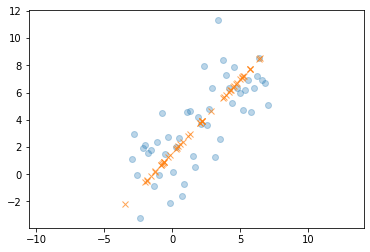

In [41]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'x', alpha=0.7)
plt.axis('equal')
plt.show()